# Prediccion de Default en Prestamos


Para este proyecto utilizaremos un sample de los datos de Lending Club. La idea es predecir si cierto usuario cometera Default basado en informacion que la plataforma recolecta. Esto nos ayudara a mejorar la metodologia/pipeline de prestamo.


# Descripcion



Contiene los prestamos de esta plataforma:

    periodo 2007-2017Q3.
    887mil observaciones, sample de 100mil
    150 variables
    Target: loan status



# Objetivo

Realizar un ETL y un EDA

## ETL

0. Limpia los datos de tal manera que al final del ETL queden en formato `tidy`.
1. Asegurate de cargar y leer los datos
2. Crea una tabla donde se guarde el nombre de la columna y el tipo de dato: (`column_name`,   `type`).
3. Asegurate de pensar cual es el tipo de dato correcto. Porque elejiste strig/object o float o int?. No hay respuestas incorrectas como tal, pero tienes que justificar tu decision.
4. Maneja missings o nans de la manera adecuada. Justifica cada decision







## EDA

0. Preparar lo datos para un pipeline de datos
1. Quitar columnas inservibles 
2. Imputar valores
3. Mantener replicabildiad y reproducibilidad

**No olvides anotar tus justificaciones en celdas para recordar cuando te toque explicarlo.** Puedes agregar el numero de celdas que necesites para poner tu explicacion y el codigo, solo manten la estructura.

# ETL

Vas a obtener 2 errores, solucionalo con los visto en clase.  
Tip: Se arreglan con argumentos adicionales de la funcion `read_csv`  
Documentacion: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html 

In [22]:
import ssl
from urllib.request import urlopen
from io import BytesIO

# Deshabilitar la verificación del certificado
ssl._create_default_https_context = ssl._create_unverified_context

# Realizar la solicitud
url = 'https://github.com/sonder-art/fdd_prim_2023/blob/main/codigo/pandas/LoansData_sample.csv.gz?raw=true'
response = urlopen(url)

with gzip.GzipFile(fileobj=BytesIO(response.read())) as f:
    df = pd.read_csv(f)



/var/folders/hx/2yrhw82s29g3zhsqchyrqcy80000gn/T/ipykernel_52971/2801879614.py:13: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,22454240,NaN,8400.0,8400.0,8400.0,36 months,9.17,267.79,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99996,99996,11396920,NaN,10000.0,10000.0,10000.0,36 months,12.99,336.90,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99997,99997,8556176,NaN,30000.0,30000.0,30000.0,60 months,20.99,811.44,E,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99998,99998,24023408,NaN,8475.0,8475.0,8475.0,36 months,24.99,336.92,F,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Tabla (column_name, type)

Revisa el metodo pd.DataFrame.dtypes. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html 

In [25]:
column_types = df.dtypes
print(column_types)

Unnamed: 0                 int64
id                         int64
member_id                float64
loan_amnt                float64
funded_amnt              float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object


## Cargar descripcion de columnas

La siguiente tabla tiene una descripcion del significado de cada columna

In [26]:
datos_dict = pd.read_excel(
    'https://resources.lendingclub.com/LCDataDictionary.xlsx')
datos_dict.columns = ['feature', 'description']


In [ ]:
dd_ordenado = datos_dict.sort_values('feature')
dd_ordenado

### Pickle

Crea codigo para **guardar** y **cargar** el DataFrame de `datos_dict` creada en las celdas anteriores en formato **pickle**

In [28]:
import pickle

with open("datos_dict.pkl", "wb") as f:
    pickle.dump(datos_dict, f)

In [72]:
with open("datos_dict.pkl", "rb") as f:
    pk_load = pickle.load(f)


In [33]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)  # 200 filas


In [74]:
pk_load.sort_values('feature',inplace=True)
pk_load

,feature,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


## Tipos de Datos

Realiza las transformaciones o casteos (casting) que creas necesarios a tus datos de tal manera que el typo de dato sea adecuado. Al terminar recrea la tabla `column_types` con los nuevos tipos.

No olvides anotar tus justificaciones para recordar cuando te toque explicarlo.

In [59]:
serie = df.dtypes
serie = serie.sort_index()
serie

Unnamed: 0                                      int64
acc_now_delinq                                float64
acc_open_past_24mths                          float64
addr_state                                     object
all_util                                      float64
annual_inc                                    float64
annual_inc_joint                              float64
application_type                               object
avg_cur_bal                                   float64
bc_open_to_buy                                float64
bc_util                                       float64
chargeoff_within_12_mths                      float64
collection_recovery_fee                       float64
collections_12_mths_ex_med                    float64
debt_settlement_flag                           object
debt_settlement_flag_date                      object
deferral_term                                 float64
delinq_2yrs                                   float64
delinq_amnt                 

Posibles columnas a castear:

In [ ]:
'''
acc_now_delinq: int
acc_open_past_24mths: int
addr_state: string  
all_util*
chargeoff_within_12_mths: int
collections_12_mths_ex_med: int
deferral_term: int
delinq_2yrs: int
desc: string
disbursement_method: string
emp_title: string
grade: string
hardship_dpd: int
hardship_length: int
hardship_loan_status: string
hardship_reason: string
hardship_status: string
hardship_type: string
home_ownership: string
id: int
inq_fi: int
inq_last_12m: int
inq_last_6mths: int
loan_status: string
member_id: int
mo_sin_old_il_acct: int
mo_sin_old_rev_tl_op: int
mo_sin_rcnt_rev_tl_op: int
mo_sin_rcnt_tl: int
mort_acc: int
mths_since_last_delinq: int
mths_since_last_major_derog: int
mths_since_last_record: int
mths_since_rcnt_il: int
mths_since_recent_bc: int
mths_since_recent_bc_dlq: int
mths_since_recent_inq: int
mths_since_recent_revol_delinq: int
num_accts_ever_120_pd: int
num_actv_bc_tl: int
num_actv_rev_tl: int
num_bc_sats: int
num_bc_tl: int
num_il_tl: int
num_op_rev_tl: int
num_rev_accts: int
num_rev_tl_bal_gt_0: int
num_sats: int
num_tl_120dpd_2m: int
num_tl_30dpd: int
num_tl_90g_dpd_24m: int
num_tl_op_past_12m: int
open_acc: int
open_acc_6m: int
open_act_il: int
open_il_12m: int
open_il_24m: int
open_rv_12m: int
open_rv_24m: int
policy_code: int
pub_rec: int
pub_rec_bankruptcies: int
purpose: string
pymnt_plan: boolean
sec_app_chargeoff_within_12_mths: int
sec_app_collections_12_mths_ex_med: int
sec_app_mort_acc: int
sec_app_mths_since_last_major_derog: int
sec_app_num_rev_accts: int
sec_app_open_acc: int
sec_app_open_act_il: int
settlemet_status: string
settlement_term: int
sub_grade: string
tax_liens: int
total_cu_tl*: int
application_type: boolean (Individual)
debt_settlement_flag: boolean
debt_settlment_flag_date: datetime64[M]
disbursement_method: boolean (Cash)
earliest_cr_line: datetime64[M]
emp_lenght: int
hardship_end_date: datetime64[M]
hardship_flag: boolean
hardship_start_date: datetime64[M]
initial_list_status: boolean
issue_d: datetime64[M]
last_credit_pull_d: datetime64[M]
last_pymnt_d: datetime64[M]
next_pymnt_d: datetime64[M]
payment_plan_start_date: datetime64[M]
settlement_date: datetime64[M]
--term* :int 
zip_code: int

*(columna vacía)
'''

In [79]:
# Eliminar columnas con todos los valores NaN
for columna in df.columns:
    if df[columna].isna().all():
        print(columna)
        df.drop(columna, inplace=True, axis=1)

annual_inc_joint
dti_joint
verification_status_joint
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
inq_fi
total_cu_tl
inq_last_12m
revol_bal_joint
sec_app_fico_range_low
sec_app_fico_range_high
sec_app_earliest_cr_line
sec_app_inq_last_6mths
sec_app_mort_acc
sec_app_open_acc
sec_app_revol_util
sec_app_open_act_il
sec_app_num_rev_accts
sec_app_chargeoff_within_12_mths
sec_app_collections_12_mths_ex_med
sec_app_mths_since_last_major_derog


In [176]:
df.to_csv('cleaner_loan_data.csv', index=False)

In [165]:
import re

lista_original = """
acc_now_delinq: int
acc_open_past_24mths: int
addr_state: string  
all_util*
chargeoff_within_12_mths: int
collections_12_mths_ex_med: int
deferral_term: int
delinq_2yrs: int
desc: string
disbursement_method: string
emp_title: string
grade: string
hardship_dpd: int
hardship_length: int
hardship_loan_status: string
hardship_reason: string
hardship_status: string
hardship_type: string
home_ownership: string
id: int
inq_fi: int
inq_last_12m: int
inq_last_6mths: int
loan_status: string
member_id: int
mo_sin_old_il_acct: int
mo_sin_old_rev_tl_op: int
mo_sin_rcnt_rev_tl_op: int
mo_sin_rcnt_tl: int
mort_acc: int
mths_since_last_delinq: int
mths_since_last_major_derog: int
mths_since_last_record: int
mths_since_rcnt_il: int
mths_since_recent_bc: int
mths_since_recent_bc_dlq: int
mths_since_recent_inq: int
mths_since_recent_revol_delinq: int
num_accts_ever_120_pd: int
num_actv_bc_tl: int
num_actv_rev_tl: int
num_bc_sats: int
num_bc_tl: int
num_il_tl: int
num_op_rev_tl: int
num_rev_accts: int
num_rev_tl_bal_gt_0: int
num_sats: int
num_tl_120dpd_2m: int
num_tl_30dpd: int
num_tl_90g_dpd_24m: int
num_tl_op_past_12m: int
open_acc: int
open_acc_6m: int
open_act_il: int
open_il_12m: int
open_il_24m: int
open_rv_12m: int
open_rv_24m: int
policy_code: int
pub_rec: int
pub_rec_bankruptcies: int
purpose: string
pymnt_plan: boolean
sec_app_chargeoff_within_12_mths: int
sec_app_collections_12_mths_ex_med: int
sec_app_mort_acc: int
sec_app_mths_since_last_major_derog: int
sec_app_num_rev_accts: int
sec_app_open_acc: int
sec_app_open_act_il: int
settlemet_status: string
settlement_term: int
sub_grade: string
tax_liens: int
total_cu_tl*: int
application_type: boolean
debt_settlement_flag: boolean
debt_settlment_flag_date: datetime64[M]
disbursement_method: boolean 
earliest_cr_line: datetime64[M]
emp_lenght: int
hardship_end_date: datetime64[M]
hardship_flag: boolean
hardship_start_date: datetime64[M]
initial_list_status: boolean
issue_d: datetime64[M]
last_credit_pull_d: datetime64[M]
last_pymnt_d: datetime64[M]
next_pymnt_d: datetime64[M]
payment_plan_start_date: datetime64[M]
settlement_date: datetime64[M]
term:int 
zip_code: int
"""

# Extraer los nombres de las columnas usando expresiones regulares
nombres_columnas = re.findall(r'^\s*([^:\s*]+)', lista_original, re.MULTILINE)

print(nombres_columnas)
print(len(nombres_columnas))


['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'deferral_term', 'delinq_2yrs', 'desc', 'disbursement_method', 'emp_title', 'grade', 'hardship_dpd', 'hardship_length', 'hardship_loan_status', 'hardship_reason', 'hardship_status', 'hardship_type', 'home_ownership', 'id', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'loan_status', 'member_id', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc

In [166]:
#Vamos a ver cuáles son las columnas que siguen estando en el dataframe, después de eliminar las columnas vacías, y que pueden ser casteadas
surviving_cols = []
for columna in nombres_columnas:
    if columna in df.columns:
        surviving_cols.append(columna)
        
print(surviving_cols)
print('Hay que castear '+str(len(surviving_cols))+ ' columnas')

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'deferral_term', 'delinq_2yrs', 'desc', 'disbursement_method', 'emp_title', 'grade', 'hardship_dpd', 'hardship_length', 'hardship_loan_status', 'hardship_reason', 'hardship_status', 'hardship_type', 'home_ownership', 'id', 'inq_last_6mths', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'pymnt_pl

In [167]:

regex_cols_no_deseadas = re.compile(r'^(?!' + '|'.join(surviving_cols) + r':).*$\n', re.MULTILINE)

lista_resultante = re.sub(regex_cols_no_deseadas, '', lista_original)

#Columnas a castear
print(lista_resultante)


acc_now_delinq: int
acc_open_past_24mths: int
addr_state: string  
chargeoff_within_12_mths: int
collections_12_mths_ex_med: int
deferral_term: int
delinq_2yrs: int
desc: string
disbursement_method: string
emp_title: string
grade: string
hardship_dpd: int
hardship_length: int
hardship_loan_status: string
hardship_reason: string
hardship_status: string
hardship_type: string
home_ownership: string
id: int
inq_last_6mths: int
loan_status: string
mo_sin_old_il_acct: int
mo_sin_old_rev_tl_op: int
mo_sin_rcnt_rev_tl_op: int
mo_sin_rcnt_tl: int
mort_acc: int
mths_since_last_delinq: int
mths_since_last_major_derog: int
mths_since_last_record: int
mths_since_recent_bc: int
mths_since_recent_bc_dlq: int
mths_since_recent_inq: int
mths_since_recent_revol_delinq: int
num_accts_ever_120_pd: int
num_actv_bc_tl: int
num_actv_rev_tl: int
num_bc_sats: int
num_bc_tl: int
num_il_tl: int
num_op_rev_tl: int
num_rev_accts: int
num_rev_tl_bal_gt_0: int
num_sats: int
num_tl_120dpd_2m: int
num_tl_30dpd: int
nu

In [168]:
lineas = [linea.strip() for linea in lista_resultante.split('\n') if linea.strip()]

# Crear el diccionario
diccionario_columnas = {}
for linea in lineas:
    nombre, tipo = linea.split(':')
    nombre = nombre.strip()
    tipo = tipo.strip()
    if tipo not in diccionario_columnas.keys():
        diccionario_columnas[tipo.strip()] = []
    diccionario_columnas[tipo.strip()].append(nombre)

# Imprimir el diccionario resultante
print(diccionario_columnas)



{'int': ['acc_now_delinq', 'acc_open_past_24mths', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'deferral_term', 'delinq_2yrs', 'hardship_dpd', 'hardship_length', 'id', 'inq_last_6mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_acc_6m', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'settlement_term', 'tax_liens', 'term', 'zip_code'], 'string': ['addr_state', 'desc', 'disbursement_method', 'emp_title', 'grade', 'hardship_loan_status', 'hardship_reason', 'h

In [169]:
for tipo in diccionario_columnas.keys():
    print(tipo)
    print(diccionario_columnas[tipo])
    print('\n') 

int
['acc_now_delinq', 'acc_open_past_24mths', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'deferral_term', 'delinq_2yrs', 'hardship_dpd', 'hardship_length', 'id', 'inq_last_6mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_acc_6m', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'settlement_term', 'tax_liens', 'term', 'zip_code']


string
['addr_state', 'desc', 'disbursement_method', 'emp_title', 'grade', 'hardship_loan_status', 'hardship_reason', 'hardshi

**Manejo de columnas boolens:**


In [150]:
#Ejemplo de cómo obtener los valores únicos de las columnas
chars = df[diccionario_columnas['boolean'][0]].unique()
print(chars)

['n' 'y']


In [ ]:
for columna in diccionario_columnas['boolean']:
    print(columna)
    print(df[columna].unique())

In [171]:
df['application_type'].unique()

array(['Individual'], dtype=object)

In [172]:
df['disbursement_method'].unique()

<StringArray>
['Cash']
Length: 1, dtype: string

In [173]:
#Las columnas 'application_type' y 'disbursement_method' son booleanas pero no tienen variabilidad, de manera que no aportan información y pueden ser eliminadas:
df.drop(['application_type','disbursement_method'], axis=1, inplace=True)

In [152]:
df['pymnt_plan'].replace({'n': False, 'y': True}, inplace=True)

In [153]:
df['debt_settlement_flag'].replace({'N': False, 'Y': True}, inplace=True)

In [154]:
df['hardship_flag'].replace({'N': False, 'Y': True}, inplace=True)

In [155]:
df['initial_list_status'].replace({'f': False, 'w': True}, inplace=True)

**Manejo de columnas string**

In [162]:
diccionario_columnas['string']

for columna in diccionario_columnas['string']:
    print(columna)
    df[columna] = df[columna].astype('string')

addr_state
desc
disbursement_method
emp_title
grade
hardship_loan_status
hardship_reason
hardship_status
hardship_type
home_ownership
loan_status
purpose
sub_grade


**Manejo de columnas int**

In [208]:
for columna in diccionario_columnas['int']:
    print(columna)


acc_now_delinq
acc_open_past_24mths
chargeoff_within_12_mths
collections_12_mths_ex_med
deferral_term
delinq_2yrs
hardship_dpd
hardship_length
id
inq_last_6mths
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_last_delinq
mths_since_last_major_derog
mths_since_last_record
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
open_acc
policy_code
pub_rec
pub_rec_bankruptcies
settlement_term
tax_liens
term
zip_code


In [188]:
for columna in diccionario_columnas['int']:
    if columna in df.columns:
        print(columna)
        print(df[columna].unique())



acc_now_delinq
[0 1 2 3 4]
acc_open_past_24mths
[ 5  7  4  2  6  8  3  0 10 12  1  9 11 14 16 13 15 24 19 17 25 18 20 21
 27 29 26 23 22 39 31 42 53 28 30 50]
chargeoff_within_12_mths
[0 1 2 3 4]
collections_12_mths_ex_med
[ 0  1  2  3  4  6 16 20]
deferral_term
[nan  3.]
delinq_2yrs
[ 0.  1.  3.  2.  4.  6.  5. 11. 13.  9. 12.  8.  7. 10. 21. 14. 22. 15.
 19. 16. 17. 18.]
hardship_dpd
[nan  9.  0. 14. 22. 23. 28. 25. 32.  7. 13. 16. 10. 21. 12. 20. 11. 18.
 26. 27.  8. 15. 19. 29. 17. 24.  3.]
hardship_length
[nan  3.]
id
[38098114 36805548 37842129 ...  8556176 24023408 24023398]
inq_last_6mths
[0. 2. 1. 3. 4. 5. 6.]
mo_sin_old_il_acct
[103.  76. 135.  16. 137. 183. 158. 121. 132.  33. 191.  93. 160. 129.
  27. 234. 136.  55.  89.  79. 131. 108.  nan  39.  92. 141. 181.  44.
 170. 122. 125.  96. 219.  88. 164. 228. 171.  36.   4. 118.  86.  81.
 128. 154. 120. 142. 133. 147.  50.   7.  51. 152. 115. 161. 167. 139.
 116. 123. 124. 166. 312. 224. 178. 100. 176. 150.  26.  73. 127. 148.

In [211]:
print('Columnas a castear '+ str(len(diccionario_columnas['int'])))
i = 0
j = 0
for columna in diccionario_columnas['int']:
    try:
        df[columna] = df[columna].astype('int32')
        i += 1
    except ValueError as e:
        print(e)
        print(columna)
        unicos = df[columna].unique()
        print(unicos)
        print(pd.isna(unicos).any())
        print
        print('\n')
        j += 1
        
print('Columnas casteadas '+ str(i))
print('Columnas no casteadas '+ str(j))

Columnas a castear 44
Cannot convert non-finite values (NA or inf) to integer
deferral_term
[nan  3.]
True


Cannot convert non-finite values (NA or inf) to integer
hardship_dpd
[nan  9.  0. 14. 22. 23. 28. 25. 32.  7. 13. 16. 10. 21. 12. 20. 11. 18.
 26. 27.  8. 15. 19. 29. 17. 24.  3.]
True


Cannot convert non-finite values (NA or inf) to integer
hardship_length
[nan  3.]
True


Cannot convert non-finite values (NA or inf) to integer
mo_sin_old_il_acct
[103.  76. 135.  16. 137. 183. 158. 121. 132.  33. 191.  93. 160. 129.
  27. 234. 136.  55.  89.  79. 131. 108.  nan  39.  92. 141. 181.  44.
 170. 122. 125.  96. 219.  88. 164. 228. 171.  36.   4. 118.  86.  81.
 128. 154. 120. 142. 133. 147.  50.   7.  51. 152. 115. 161. 167. 139.
 116. 123. 124. 166. 312. 224. 178. 100. 176. 150.  26.  73. 127. 148.
  94. 159. 301.  58. 151. 162. 278. 153. 105. 256. 140.  99. 180. 104.
  53. 149.  43.  87. 130. 156.  66. 194. 138. 174.  68. 169.  57. 172.
  98.  91. 102.  24.  21. 207.   6. 101.  1

El problema para castear el resto de columnas a 'int' es que contienen valores nan, a excepción de la columna *zip_code*, esta contiene además de números, caracteres 'xx', por lo que hay que formatear usando un regex

In [213]:
df['zip_code'] = df['zip_code'].str.replace(r'\D', '', regex=True)

df['zip_code'] = df['zip_code'].astype('int32')

**Manejo de columnas datetime**

In [263]:
columna_cargada = pd.read_csv('cleaner_loan_data.csv', usecols=['hardship_start_date'])['hardship_start_date']
df['hardship_start_date'] = columna_cargada

In [289]:
print(diccionario_columnas['datetime64[M]'])
for columna in diccionario_columnas['datetime64[M]']:
    if columna in df.columns:
        print(columna)
        print(df[columna].dtype)
        print(df[columna].unique())
        print('\n')



['earliest_cr_line', 'hardship_end_date', 'hardship_start_date', 'issue_d', 'last_credit_pull_d', 'last_pymnt_d', 'next_pymnt_d', 'payment_plan_start_date', 'settlement_date']
earliest_cr_line
object
['Aug-1994' 'Sep-1989' 'Aug-2003' 'Oct-2000' 'Aug-2002' 'Nov-1992'
 'Oct-2001' 'Nov-2003' 'Oct-1998' 'May-2009' 'Jul-2003' 'Jan-1999'
 'Jan-2001' 'Nov-1987' 'Jul-1989' 'Sep-1996' 'Jun-1995' 'Dec-1993'
 'Feb-2010' 'Jul-2007' 'Jun-2006' 'Nov-1999' 'Jan-2002' 'Jun-2001'
 'Nov-1998' 'Apr-2007' 'Mar-2003' 'Mar-2002' 'Nov-2005' 'Jul-2001'
 'Jan-2003' 'Dec-2006' 'Sep-1981' 'Dec-1995' 'Sep-2000' 'Mar-1992'
 'Mar-2011' 'Mar-2004' 'Oct-2007' 'Aug-2000' 'Jul-2002' 'Mar-1995'
 'Oct-2003' 'Jan-1981' 'Mar-1999' 'Sep-2002' 'Aug-2008' 'May-2007'
 'Aug-2006' 'Jan-1998' 'Jun-1996' 'Jun-2004' 'Aug-1989' 'Mar-1977'
 'Feb-1997' 'Oct-2010' 'Mar-1982' 'Oct-1993' 'Aug-2004' 'Aug-1996'
 'Nov-1984' 'Apr-1987' 'Dec-1988' 'Feb-1994' 'Jul-1996' 'Apr-1993'
 'Apr-2000' 'Oct-1999' 'Mar-2000' 'May-2004' 'Apr-2003' 'May-19

In [293]:
#Ejemplo

# Crear un DataFrame de ejemplo con una columna de fechas en formato string
data = {'Fecha': ['Aug-1994', 'Sep-1995', 'Oct-1996', 'Nov-1997','nan','NaT',None]}
pr = pd.DataFrame(data)
print(pr['Fecha'].dtype)
# Convertir la columna 'Fecha' a objetos datetime de pandas
pr['Fecha'] = pd.to_datetime(pr['Fecha'], format='%b-%Y')

# Truncar la columna para obtener precisión hasta el mes
pr['Fecha'] = pr['Fecha'].dt.to_period('M')

# Verificar el tipo de datos de la columna 'Fecha'
print(pr['Fecha'])

object
0    1994-08
1    1995-09
2    1996-10
3    1997-11
4        NaT
5        NaT
6        NaT
Name: Fecha, dtype: period[M]


In [290]:
lista_final

['earliest_cr_line',
 'hardship_end_date',
 'hardship_start_date',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_d',
 'next_pymnt_d',
 'payment_plan_start_date',
 'settlement_date']

In [299]:
#Haz una copia del dataframe que esta en df:
df_copy = df.copy()
df_copy

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,15000.0,15000.0,15000.0,60,12.39,336.64,C,C1,MANAGEMENT,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,10400.0,10400.0,10400.0,36,6.99,321.08,A,A3,Truck Driver Delivery Personel,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,21425.0,21425.0,21425.0,60,15.59,516.36,D,D1,Programming Analysis Supervisor,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,12800.0,12800.0,12800.0,60,17.14,319.08,D,D4,Senior Sales Professional,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,7650.0,7650.0,7650.0,36,13.66,260.20,C,C3,Technical Specialist,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22454240,8400.0,8400.0,8400.0,36,9.17,267.79,B,B1,Software Engineer,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
99996,11396920,10000.0,10000.0,10000.0,36,12.99,336.90,C,C1,Assistant Professor of English,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
99997,8556176,30000.0,30000.0,30000.0,60,20.99,811.44,E,E4,Facilities Tech 3,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
99998,24023408,8475.0,8475.0,8475.0,36,24.99,336.92,F,F4,Records Examiner Analyst,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
# Convertir la columna 'Fecha' a objetos datetime de pandas
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')

# Truncar la columna para obtener precisión hasta el mes
df['earliest_cr_line'] = df['earliest_cr_line'].dt.to_period('M')

# Verificar el tipo de datos de la columna 'Fecha'
print(df['earliest_cr_line'])

0        1994-08
1        1989-09
2        2003-08
3        2000-10
4        2002-08
          ...   
99995    1990-08
99996    2001-05
99997    1998-06
99998    2000-11
99999    1999-07
Name: earliest_cr_line, Length: 100000, dtype: period[M]


In [319]:
#df['hardship_end_date'] = df['hardship_end_date'].dt.to_period('M')

# Verificar el tipo de datos de la columna 'Fecha'
print(df['hardship_end_date'].unique())

<PeriodArray>
[    'NaT', '2017-08', '2017-11', '2017-09', '2017-07', '2017-12', '2017-10',
 '2018-01', '2018-02', '2017-06', '2018-03', '2017-04']
Length: 12, dtype: period[M]


In [320]:
# Convertir la columna 'Fecha' a objetos datetime de pandas
df['hardship_start_date'] = pd.to_datetime(df['hardship_start_date'], format='%b-%Y')

# Truncar la columna para obtener precisión hasta el mes
df['hardship_start_date'] = df['hardship_start_date'].dt.to_period('M')

# Verificar el tipo de datos de la columna 'Fecha'
print(df['hardship_start_date'].unique())

<PeriodArray>
[    'NaT', '2017-05', '2017-09', '2017-06', '2017-08', '2017-10', '2017-07',
 '2017-11', '2017-12', '2017-02']
Length: 10, dtype: period[M]


In [321]:
# Convertir la columna 'Fecha' a objetos datetime de pandas
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

# Truncar la columna para obtener precisión hasta el mes
df['issue_d'] = df['issue_d'].dt.to_period('M')

# Verificar el tipo de datos de la columna 'Fecha'
print(df['issue_d'].unique())

<PeriodArray>
['2014-12', '2014-11', '2014-10', '2014-09', '2014-08']
Length: 5, dtype: period[M]


In [322]:
# Convertir la columna 'Fecha' a objetos datetime de pandas
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%Y')

# Truncar la columna para obtener precisión hasta el mes
df['last_credit_pull_d'] = df['last_credit_pull_d'].dt.to_period('M')

# Verificar el tipo de datos de la columna 'Fecha'
print(df['last_credit_pull_d'].unique())

<PeriodArray>
['2017-11', '2017-02', '2017-12', '2016-10', '2015-04', '2017-08', '2017-04',
 '2016-06', '2016-07', '2016-02', '2017-01', '2017-06', '2017-10', '2017-09',
 '2017-05', '2017-03', '2016-03', '2016-09', '2015-11', '2015-03', '2016-01',
 '2017-07', '2015-10', '2016-11', '2015-06', '2015-09', '2016-12', '2015-07',
 '2016-05', '2016-04', '2015-12', '2016-08', '2015-01', '2015-05', '2014-12',
 '2015-08', '2015-02', '2014-11',     'NaT', '2014-10', '2014-09', '2014-08']
Length: 42, dtype: period[M]


In [323]:
# Convertir la columna 'Fecha' a objetos datetime de pandas
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%Y')

# Truncar la columna para obtener precisión hasta el mes
df['last_pymnt_d'] = df['last_pymnt_d'].dt.to_period('M')

# Verificar el tipo de datos de la columna 'Fecha'
print(df['last_pymnt_d'].unique())

<PeriodArray>
['2016-06', '2016-08', '2016-05', '2017-12', '2015-08', '2015-04', '2015-06',
 '2016-09', '2016-02', '2015-05', '2016-10', '2016-03', '2017-04', '2017-02',
 '2017-10', '2016-07', '2017-11', '2017-06', '2015-12', '2017-01', '2016-11',
 '2015-01', '2015-09', '2017-09', '2015-02', '2017-03', '2016-01', '2016-12',
 '2015-11', '2015-03', '2017-07', '2016-04', '2015-10', '2017-05', '2015-07',
 '2017-08', '2014-12',     'NaT', '2014-11', '2014-10', '2014-09', '2014-08']
Length: 42, dtype: period[M]


In [ ]:
# Convertir la columna 'Fecha' a objetos datetime de pandas
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%Y')

# Truncar la columna para obtener precisión hasta el mes
df['next_pymnt_d'] = df['next_pymnt_d'].dt.to_period('M')

# Verificar el tipo de datos de la columna 'Fecha'
print(df['next_pymnt_d'].unique())

In [325]:
# Convertir la columna 'Fecha' a objetos datetime de pandas
df['payment_plan_start_date'] = pd.to_datetime(df['payment_plan_start_date'], format='%b-%Y')

# Truncar la columna para obtener precisión hasta el mes
df['payment_plan_start_date'] = df['payment_plan_start_date'].dt.to_period('M')

# Verificar el tipo de datos de la columna 'Fecha'
print(df['payment_plan_start_date'].unique())

<PeriodArray>
[    'NaT', '2017-05', '2017-09', '2017-07', '2017-06', '2017-08', '2017-10',
 '2017-11', '2017-12', '2018-01', '2017-02']
Length: 11, dtype: period[M]


In [326]:
# Convertir la columna 'Fecha' a objetos datetime de pandas
df['settlement_date'] = pd.to_datetime(df['settlement_date'], format='%b-%Y')

# Truncar la columna para obtener precisión hasta el mes
df['settlement_date'] = df['settlement_date'].dt.to_period('M')

# Verificar el tipo de datos de la columna 'Fecha'
print(df['settlement_date'].unique())

<PeriodArray>
[    'NaT', '2017-07', '2017-05', '2017-04', '2017-11', '2016-08', '2017-10',
 '2017-09', '2017-08', '2017-02', '2017-06', '2017-03', '2016-01', '2016-04',
 '2016-06', '2017-01', '2017-12', '2016-11', '2015-10', '2015-12', '2015-07',
 '2016-02', '2016-09', '2016-03', '2016-12', '2015-08', '2016-10', '2015-11',
 '2015-09', '2016-05', '2016-07', '2015-06', '2015-05', '2015-03', '2015-04',
 '2015-02']
Length: 36, dtype: period[M]


**Ultimas revisiones**

In [330]:
df['emp_length']

0        10+ years
1          8 years
2          6 years
3        10+ years
4         < 1 year
           ...    
99995      2 years
99996      3 years
99997    10+ years
99998    10+ years
99999      3 years
Name: emp_length, Length: 100000, dtype: object

In [338]:
# Definir una función para convertir 'emp_length' a formato int
def convertir_emp_length(emp_length):
    if pd.isna(emp_length):
        return np.nan
    if emp_length == '< 1 year':
        return 0
    elif emp_length == '10+ years':
        return 10
    else:
        return int(emp_length.split()[0])

# Aplicar la función a la columna 'emp_length'
df['emp_length'] = df['emp_length'].apply(convertir_emp_length)

# Verificar el resultado

df['emp_length'] 

0        10.0
1         8.0
2         6.0
3        10.0
4         0.0
         ... 
99995     2.0
99996     3.0
99997    10.0
99998    10.0
99999     3.0
Name: emp_length, Length: 100000, dtype: float64

In [340]:
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [342]:
df['verification_status'] = df['verification_status'].astype('string')
df['verification_status']

0        Source Verified
1           Not Verified
2        Source Verified
3               Verified
4        Source Verified
              ...       
99995    Source Verified
99996       Not Verified
99997           Verified
99998           Verified
99999    Source Verified
Name: verification_status, Length: 100000, dtype: string

In [394]:
df['title'] = df['title'].astype('string')
df['title']

0             Debt consolidation
1        Credit card refinancing
2        Credit card refinancing
3                  Car financing
4             Debt consolidation
                  ...           
99995         Debt consolidation
99996         Debt consolidation
99997         Debt consolidation
99998         Debt consolidation
99999         Debt consolidation
Name: title, Length: 100000, dtype: string

In [410]:
df['debt_settlement_flag_date'] = pd.to_datetime(df['debt_settlement_flag_date'], format='%b-%Y')

# Truncar la columna para obtener precisión hasta el mes
df['debt_settlement_flag_date'] = df['debt_settlement_flag_date'].dt.to_period('M')

# Verificar el tipo de datos de la columna 'Fecha'
print(df['debt_settlement_flag_date'].unique())

<PeriodArray>
[    'NaT', '2017-07', '2017-04', '2017-11', '2017-03', '2017-10', '2017-09',
 '2017-08', '2016-12', '2016-07', '2017-06', '2017-02', '2017-12', '2015-11',
 '2017-01', '2016-02', '2015-12', '2016-06', '2016-08', '2016-05', '2016-09',
 '2016-10', '2017-05', '2016-04', '2015-09', '2016-03', '2015-07', '2016-11',
 '2016-01', '2015-06', '2015-08', '2015-10', '2015-03', '2015-02']
Length: 34, dtype: period[M]


In [411]:
df['settlement_status'] = df['settlement_status'].astype('string') 
df['settlement_status'].unique()

<StringArray>
[<NA>, 'ACTIVE', 'BROKEN', 'COMPLETE']
Length: 4, dtype: string

In [353]:
values = df.dtypes
print('object' in values.values)

False


In [360]:
df.to_csv('cleaner_loan_data.csv', index=False)

In [380]:
ser = df.dtypes
ser = ser.sort_index()  
ser

acc_now_delinq                                         int32
acc_open_past_24mths                                   int32
addr_state                                    string[python]
annual_inc                                           float64
avg_cur_bal                                          float64
bc_open_to_buy                                       float64
bc_util                                              float64
chargeoff_within_12_mths                               int32
collection_recovery_fee                              float64
collections_12_mths_ex_med                             int32
debt_settlement_flag                                    bool
debt_settlement_flag_date                          period[M]
deferral_term                                        float64
delinq_2yrs                                            int32
delinq_amnt                                          float64
desc                                          string[python]
dti                     

Todas las columnas están en su correspondiente formato.

In [415]:
# Guardar el DataFrame en un archivo Pickle
df.to_pickle('loans_df.pkl')

In [416]:
loaded_df = pd.read_pickle('loans_df.pkl')

## Manejo de NaNs o missings

Maneja los datos de tipos missing. Elije una estrategia adecuada dependiendo del tipo de dato que le asignaste a la columna.


Crea codigo para **guardar** y **cargar** un archivo JSON en el que se guarde la `estrategia` y `valor` que utilizaste para **imputar**. Por ejemplo: Si hay una columna que se llama `columna 3` y utilizaste la estrategia de imputacion de media, y existe otra llamada `columna 4` y  elegiste la palabra 'missing' el JSON debera contener:  
  
 `{'columna 3':{'estrategia':'mean', 'valor':3.4}, 'columna 4':{'estrategia':'identificador', 'valor':'missing'}}`  

 De tal manera que para cada columna que tenga un metodo de imputacion apunte a otro diccionario donde el **key** `estrategia` describa de manera sencilla el metodo, y el **key** `valor` el valor usado. En general:   
 `{'nombre de la columna':{'estrategia':'descripcion de estrategia', 'valor':'valor utilizado'}}`. 
 

De utilizar mas de un metodo puedes anidarlos en una lista  
  `[{...},{...}]`.  

Incluso si la columna utilizada no sufrio imputacion, es necesario que la agregues al JSON.

La idea es que cualquier otra persona pueda cargar el el archivo JSON con tu funcion, entender que hiciste y replicarlo facilmente. No existe solo una respuesta correcta, pero tendras que justificar y explicar tus deciciones.

### Imputacion

In [357]:
#Veamos qué columnas tienen asociado tipo de dato NaN
c_nans = []
for columna in df.columns:
    if pd.isna(df[columna]).any():
        print(columna)
        c_nans.append(columna)

emp_length
mths_since_last_delinq
mths_since_last_record
revol_util
last_pymnt_d
next_pymnt_d
last_credit_pull_d
mths_since_last_major_derog
bc_open_to_buy
bc_util
mo_sin_old_il_acct
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_tl_120dpd_2m
percent_bc_gt_75
deferral_term
hardship_amount
hardship_start_date
hardship_end_date
payment_plan_start_date
hardship_length
hardship_dpd
orig_projected_additional_accrued_interest
hardship_payoff_balance_amount
hardship_last_payment_amount
debt_settlement_flag_date
settlement_status
settlement_date
settlement_amount
settlement_percentage
settlement_term


In [359]:
#Para cada columna en c.nans, vamos a ver cuántos valores NaN tiene
for columna in c_nans:
    print(columna)
    print(pd.isna(df[columna]).sum())

emp_length
5259
mths_since_last_delinq
48703
mths_since_last_record
83268
revol_util
56
last_pymnt_d
67
next_pymnt_d
86138
last_credit_pull_d
17
mths_since_last_major_derog
72059
bc_open_to_buy
1135
bc_util
1198
mo_sin_old_il_acct
3007
mths_since_recent_bc
1049
mths_since_recent_bc_dlq
73545
mths_since_recent_inq
9818
mths_since_recent_revol_delinq
63814
num_tl_120dpd_2m
1956
percent_bc_gt_75
1161
deferral_term
99815
hardship_amount
99815
hardship_start_date
99815
hardship_end_date
99815
payment_plan_start_date
99815
hardship_length
99815
hardship_dpd
99815
orig_projected_additional_accrued_interest
99848
hardship_payoff_balance_amount
99815
hardship_last_payment_amount
99815
debt_settlement_flag_date
98710
settlement_status
98710
settlement_date
98710
settlement_amount
98710
settlement_percentage
98710
settlement_term
98710


In [375]:
i = 0
tipes = df['loan_status'].unique()
for tipo in tipes:
    print(tipo)
    ser = df['loan_status'][df['loan_status'] == tipo]
    print(ser.count())
#Cuenta cuantos 'Default' hay en la columna 'loan_status':


Fully Paid
69982
Charged Off
16156
Current
12726
Late (31-120 days)
730
Late (16-30 days)
139
In Grace Period
264
Default
3
100000


### Codigo para salvar y cargar JSONs

In [381]:
#Las variables que pueden ser de interés para el modelo de predicción son:
lista = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_pymnt_d', 'pub_rec_bankruptcies', 'defaulted']

#https://github.com/PacktPublishing/Practical-Data-Science-using-Python/blob/main/Lending-Club-EDA-Project%202.ipynb

In [427]:
imputaciones = []
i = 0
for columna in df.columns:
    if columna in lista:
        i += 1
        if columna in c_nans:
            print(columna)
            imputaciones.append(columna)
            print('Tiene NaN')


emp_length
Tiene NaN
revol_util
Tiene NaN
last_pymnt_d
Tiene NaN


In [428]:
#Escribe el código para contar cuántos valores NaN hay en cada columna de la lista:
for columna in imputaciones:
    print(columna)
    print(pd.isna(df[columna]).sum())

emp_length
5259
revol_util
56
last_pymnt_d
67


Mi estrategia, dado que la cantidad es pequeña respecto al tamaño de la muestra, será eliminar los renglones con nans:

In [430]:
df_copy = df.copy()

In [431]:
columnas_con_nan = ['emp_length', 'revol_util', 'last_pymnt_d']

# Elimina los renglones que contienen NaNs en las columnas especificadas
df_sin_nan = df_copy.dropna(subset=columnas_con_nan)

In [435]:
df_sin_nan.shape

(94631, 117)

In [436]:

import json

imputation_strat = {}

for columna in df.columns:
    if columna in columnas_con_nan:
        imputation_strat[columna] = {'estrategia': 'eliminar_renglones', 'valor': None}
    else:
        imputation_strat[columna] = {'estrategia': 'ninguna', 'valor': None}

json_str = json.dumps(imputation_strat, indent=2)

with open('imputaciones.json', 'w') as json_file:
    json_file.write(json_str)

with open('imputaciones.json', 'r') as json_file:
    load = json.load(json_file)

# Imprimir el diccionario cargado
print(load)

{'id': {'estrategia': 'ninguna', 'valor': None}, 'loan_amnt': {'estrategia': 'ninguna', 'valor': None}, 'funded_amnt': {'estrategia': 'ninguna', 'valor': None}, 'funded_amnt_inv': {'estrategia': 'ninguna', 'valor': None}, 'term': {'estrategia': 'ninguna', 'valor': None}, 'int_rate': {'estrategia': 'ninguna', 'valor': None}, 'installment': {'estrategia': 'ninguna', 'valor': None}, 'grade': {'estrategia': 'ninguna', 'valor': None}, 'sub_grade': {'estrategia': 'ninguna', 'valor': None}, 'emp_title': {'estrategia': 'ninguna', 'valor': None}, 'emp_length': {'estrategia': 'eliminar_renglones', 'valor': None}, 'home_ownership': {'estrategia': 'ninguna', 'valor': None}, 'annual_inc': {'estrategia': 'ninguna', 'valor': None}, 'verification_status': {'estrategia': 'ninguna', 'valor': None}, 'issue_d': {'estrategia': 'ninguna', 'valor': None}, 'loan_status': {'estrategia': 'ninguna', 'valor': None}, 'pymnt_plan': {'estrategia': 'ninguna', 'valor': None}, 'desc': {'estrategia': 'ninguna', 'valor':

In [440]:
for columna in df_copy.columns:
    if columna not in lista:
        df_copy.drop(columna, axis=1, inplace=True)

df_copy.reset_index(drop=True, inplace=True)

In [443]:
loan=df_copy

**Distribución en los montos de préstamo**

/var/folders/hx/2yrhw82s29g3zhsqchyrqcy80000gn/T/ipykernel_52971/2822412226.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(loan['loan_amnt'], rug=True)


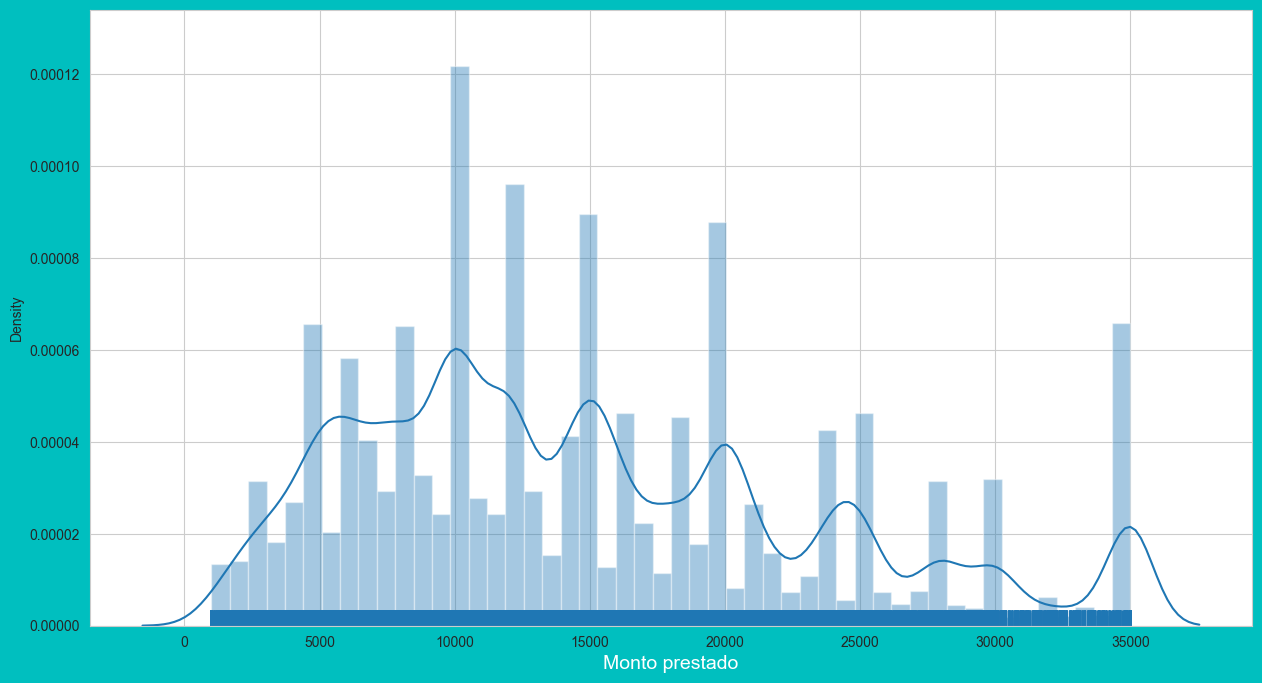

In [465]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 8), facecolor='c')
sns.set_style("whitegrid")

ax = sns.distplot(loan['loan_amnt'], rug=True)
ax.set_xlabel('Monto prestado', fontsize=14, color='w')

plt.show()

**Distribución de la tasa de interés**

/var/folders/hx/2yrhw82s29g3zhsqchyrqcy80000gn/T/ipykernel_52971/1071752631.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(loan['int_rate'],rug = True)


Text(0.5, 0, 'Tasa de intéres')

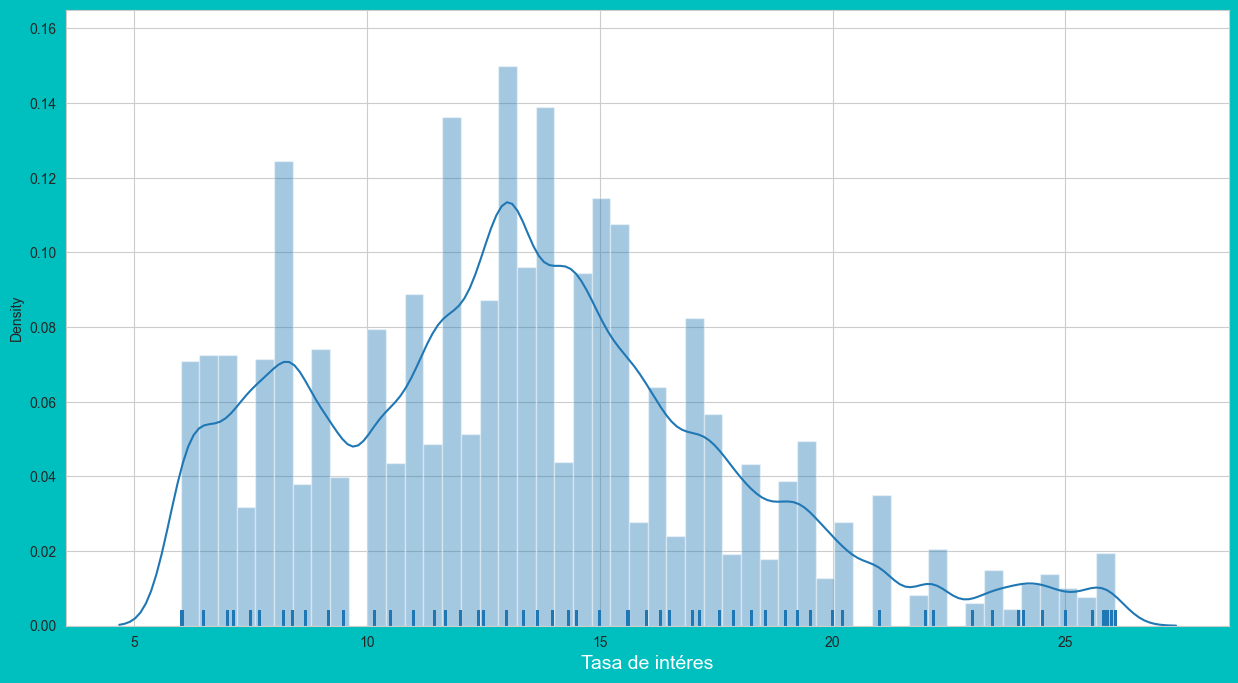

In [464]:

plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("whitegrid")

ax = sns.distplot(loan['int_rate'],rug = True)
ax.set_xlabel('Tasa de intéres',fontsize=14,color='w')
